# Online Learning Experiments - Group Project

This notebook contains all experiments for the Online Learning project, organized in a modular and scalable way.

## Table of Contents
1. [Setup and Imports](#setup)
2. [Experiment Configuration Framework](#framework)
3. [Task 1.1: UCB1 Simple Pricing](#task1_1)
4. [Task 1.2: Constrained UCB Pricing](#task1_2)
5. [Task 2.1: Combinatorial UCB Multi-Product](#task2_1)
6. [Task 3.1: Primal-Dual Non-Stationary](#task3_1)
7. [Task 4.1: Multi-Product Primal-Dual](#task4_1)
8. [Task 5.1: Sliding Window Non-Stationarity](#task5_1)

## Setup and Imports

In [1]:
%load_ext autoreload
%autoreload 2

print("Autoreload abilitato - i moduli verranno ricaricati automaticamente quando modificati")

Autoreload abilitato - i moduli verranno ricaricati automaticamente quando modificati


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import warnings


warnings.filterwarnings('ignore')

from environments import *
from agents import *
from data_generators import *
from utils import *
from runner import *
from plotter import *
from scipy.stats import beta

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12

print("Setup completed successfully!")


Experiment framework created successfully!
Plotting and analysis utilities created successfully!
Setup completed successfully!


## <a id="task1_1"></a>Task 1.1: UCB1 Simple Pricing

Implementation of UCB1 for the pricing problem with uniform valuations.

Task 1.1 - UCB1 Simple Pricing
Prices: [0.2   0.256 0.311 0.367 0.422 0.478 0.553 0.589 0.644 0.7   0.756 0.811
 0.867 0.922 0.98  1.001]

=== Eseguendo esperimento con distribuzione Uniform ===
Running Task 1.1 - UCB1 Simple Pricing (Uniform)
Horizon: 20000, Trials: 3
Trial 1/3... Sell Probabilities: [ 0.8    0.744  0.689  0.633  0.578  0.522  0.447  0.411  0.356  0.3
  0.244  0.189  0.133  0.078  0.02  -0.001]
Expected Revenues: [ 0.16      0.190464  0.214279  0.232311  0.243916  0.249516  0.247191
  0.242079  0.229264  0.21      0.184464  0.153279  0.115311  0.071916
  0.0196   -0.001001]
Best price index: 5, Expected revenue: 0.249516
✓
Trial 2/3... Sell Probabilities: [ 0.8    0.744  0.689  0.633  0.578  0.522  0.447  0.411  0.356  0.3
  0.244  0.189  0.133  0.078  0.02  -0.001]
Expected Revenues: [ 0.16      0.190464  0.214279  0.232311  0.243916  0.249516  0.247191
  0.242079  0.229264  0.21      0.184464  0.153279  0.115311  0.071916
  0.0196   -0.001001]
Best price index: 5, E

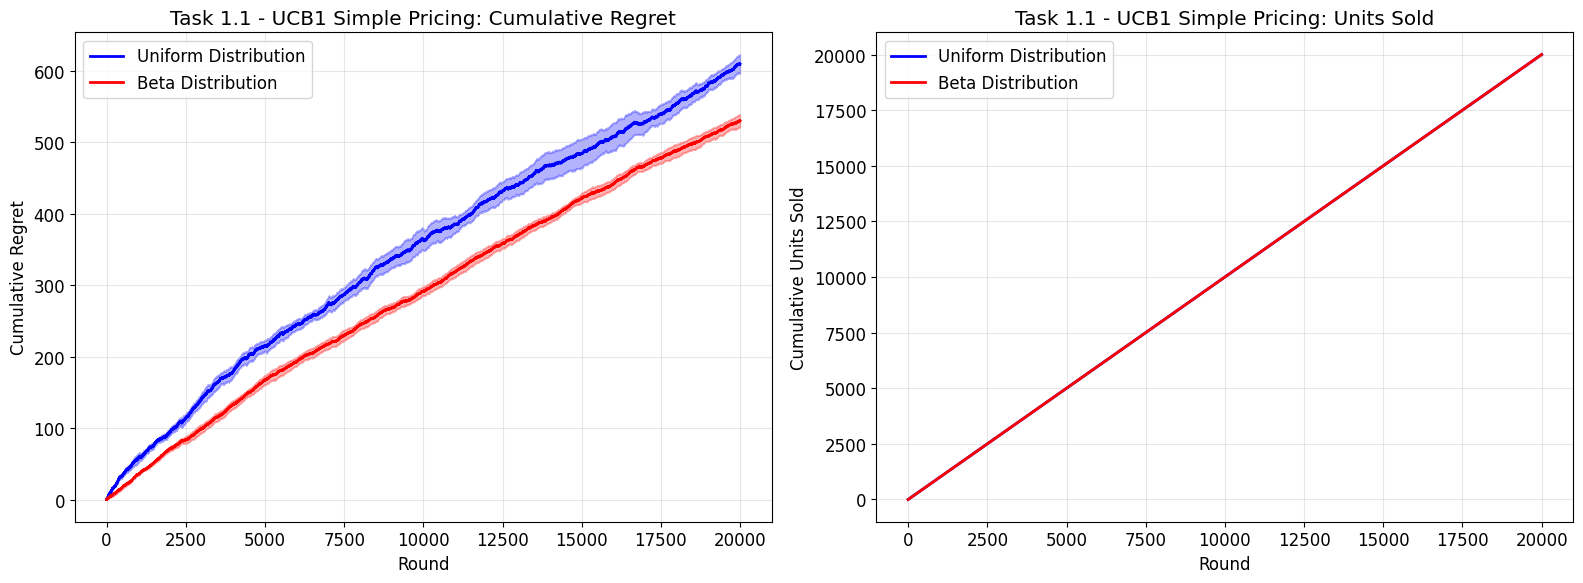


=== ANALISI DETTAGLIATA ===

--- Distribuzione Uniform ---

RESULTS FOR Task 1.1 - UCB1 Simple Pricing (Uniform)
Execution time: 0.37 seconds
Completed rounds: 20000
Average regret per round: 0.030482
Average final reward: 4380.69 ± 22.64
Efficiency vs clairvoyant: 87.8%
Average units sold: 20000.00/1000.0 (2000.0%)
Empirical average rewards: [0.1597 0.1897 0.2118 0.2365 0.2422 0.251  0.2485 0.2413 0.2272 0.2137
 0.1679 0.1676 0.1173 0.0814 0.0152 0.    ]

--- Distribuzione Beta ---

RESULTS FOR Task 1.1 - UCB1 Simple Pricing (Beta)
Execution time: 0.39 seconds
Completed rounds: 20000
Average regret per round: 0.026500
Average final reward: 1035.78 ± 14.38
Efficiency vs clairvoyant: 66.2%
Average units sold: 20000.00/1000.0 (2000.0%)
Empirical average rewards: [0.0714 0.0794 0.078  0.0768 0.0759 0.0549 0.0475 0.0434 0.036  0.0242
 0.023  0.0148 0.0074 0.0014 0.     0.    ]

=== CONFRONTO FINALE ===
Uniform: Final Average Regret = 609.6303, Final Average Reward = 4380.6897
Beta: Final 

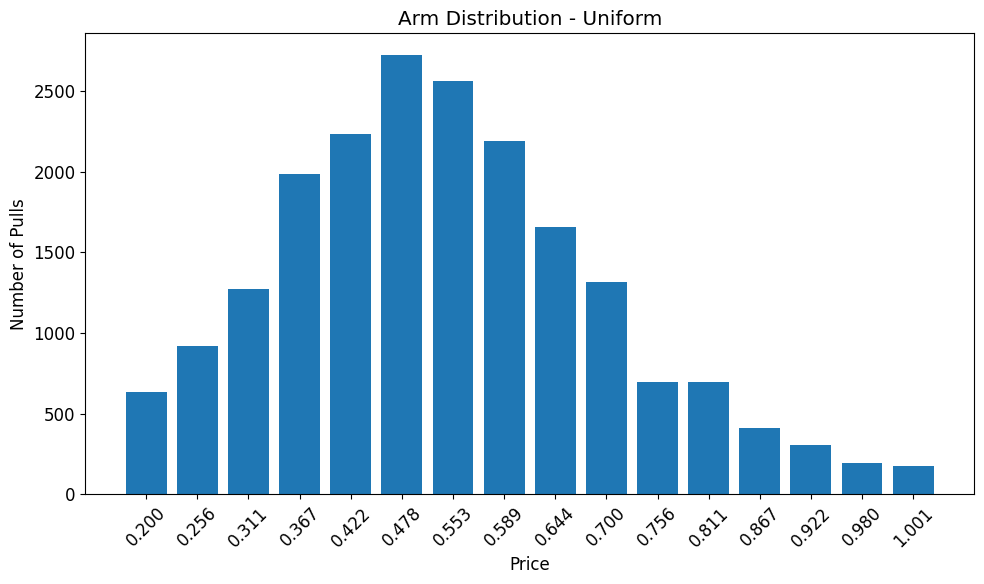

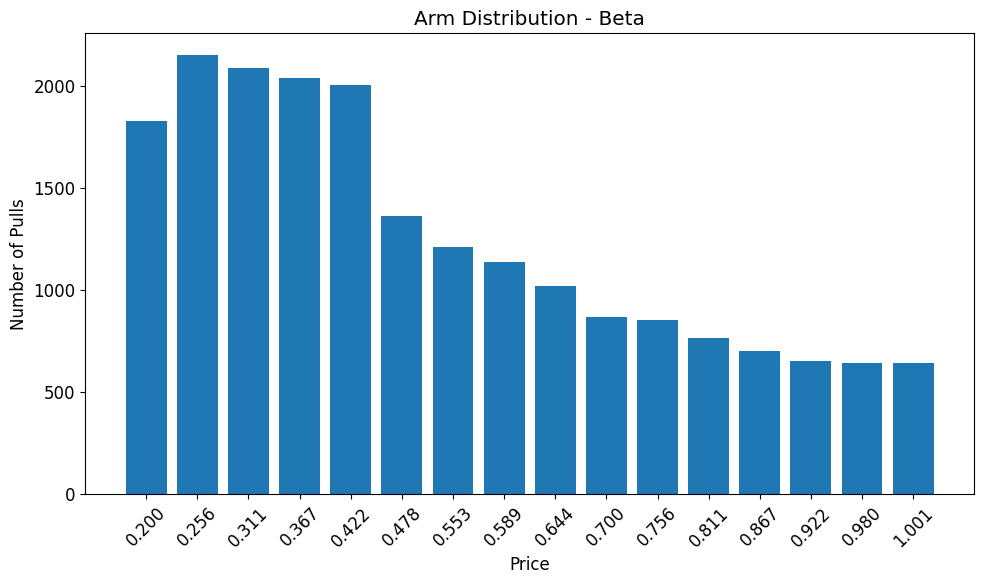

In [12]:
class Task1_1_Runner(StandardExperimentRunner):
    """UCB1 Simple Pricing experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.prices = config.prices
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = PricingEnvironment(
            self.prices, self.config.horizon, rng=rng, distribution=self.distribution)
        return self.env

    def create_agent(self):
        self.agent = UCB1PricingAgent(len(self.prices), self.config.horizon)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        if self.distribution == Distribution.UNIFORM:
            self.probabilities = 1 - self.prices
        elif self.distribution == Distribution.BETA:
            self.probabilities = 1 - beta.cdf(self.prices, 0.5, 2)
        else:
            raise ValueError(f"Distribution {self.distribution} not supported")
        print(f"Sell Probabilities: {self.probabilities}")
        self.expected_revenues = self.prices * self.probabilities
        print(f"Expected Revenues: {self.expected_revenues}")
        self.best_idx = np.argmax(self.expected_revenues)
        print(f"Best price index: {self.best_idx}, Expected revenue: {self.expected_revenues[self.best_idx]}")
        self.clairvoyant_reward_per_round = self.expected_revenues[self.best_idx]

        return self.clairvoyant_reward_per_round

    def extract_metrics(self, result) -> tuple[float, float]:
        return float(result), 1.0


price_grid = create_default_prices()
config = ExperimentConfig(
    task_name="Task 1.1 - UCB1 Simple Pricing",
    horizon=20_000,
    n_trials=3,
    seed=18,
    prices=price_grid,
    distribution=[Distribution.UNIFORM, Distribution.BETA],
)

print(f"Task 1.1 - UCB1 Simple Pricing")
print(f"Prices: {price_grid}")

# Esegui gli esperimenti
multi_runner = MultiDistributionRunner(Task1_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=False)

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## <a id="task1_2"></a>Task 1.2: Constrained UCB Pricing

Implementation of Constrained UCB for pricing with budget constraints.


Task 1.2 - Constrained UCB Pricing
Prices: 11 prices from 0.100 to 1.000
Budget: 12000, Horizon: 20000

=== Eseguendo esperimento con distribuzione Beta ===
Running Task 1.2 - Constrained UCB Pricing (Beta)
Horizon: 20000, Trials: 3
Trial 1/3... Sell Probabilities Beta : [8.85735e-01 6.55360e-01 4.20175e-01 2.33280e-01 1.09375e-01 4.09600e-02
 1.09350e-02 1.60000e-03 5.50000e-05 0.00000e+00 0.00000e+00]
Expected Revenues Beta : [8.857350e-02 1.310720e-01 1.260525e-01 9.331200e-02 5.468750e-02
 2.457600e-02 7.654500e-03 1.280000e-03 4.950000e-05 0.000000e+00
 0.000000e+00]
Expected utility: 0.1299
Optimal distribution (gamma): [0.         0.76461084 0.23538916 0.         0.         0.
 0.         0.         0.         0.         0.        ]
Expected cost: 0.6000
✓
Trial 2/3... Sell Probabilities Beta : [8.85735e-01 6.55360e-01 4.20175e-01 2.33280e-01 1.09375e-01 4.09600e-02
 1.09350e-02 1.60000e-03 5.50000e-05 0.00000e+00 0.00000e+00]
Expected Revenues Beta : [8.857350e-02 1.310720e-01 

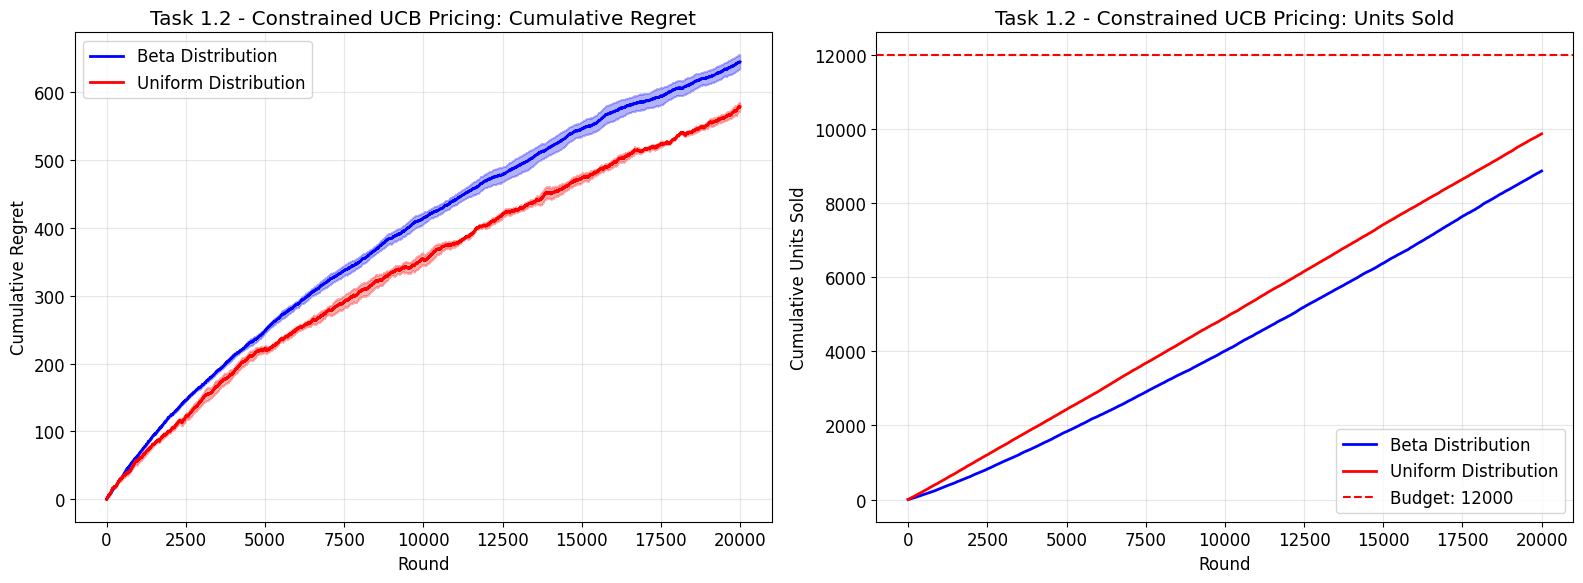


=== ANALISI DETTAGLIATA ===

--- Distribuzione Beta ---

RESULTS FOR Task 1.2 - Constrained UCB Pricing (Beta)
Execution time: 194.87 seconds
Completed rounds: 20000
Average regret per round: 0.032235
Average final reward: 1953.10 ± 18.30
Efficiency vs clairvoyant: 75.2%
Average units sold: 8860.67/12000 (73.8%)

--- Distribuzione Uniform ---

RESULTS FOR Task 1.2 - Constrained UCB Pricing (Uniform)
Execution time: 348.05 seconds
Completed rounds: 20000
Average regret per round: 0.028920
Average final reward: 4421.60 ± 11.70
Efficiency vs clairvoyant: 88.4%
Average units sold: 9861.67/12000 (82.2%)

=== CONFRONTO FINALE ===
Beta: Final Average Regret = 644.7093, Final Average Reward = 1953.1000
Uniform: Final Average Regret = 578.4000, Final Average Reward = 4421.6000


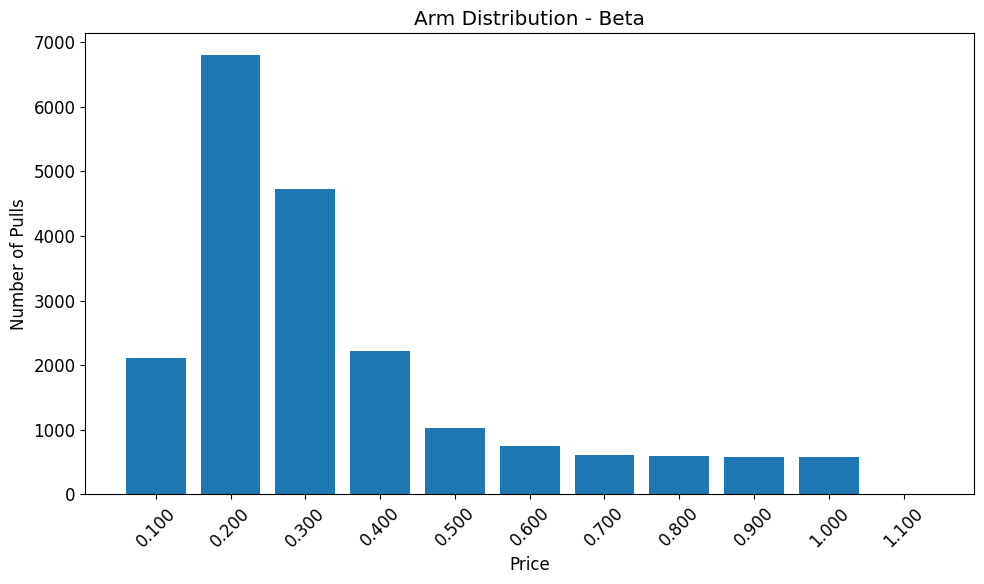

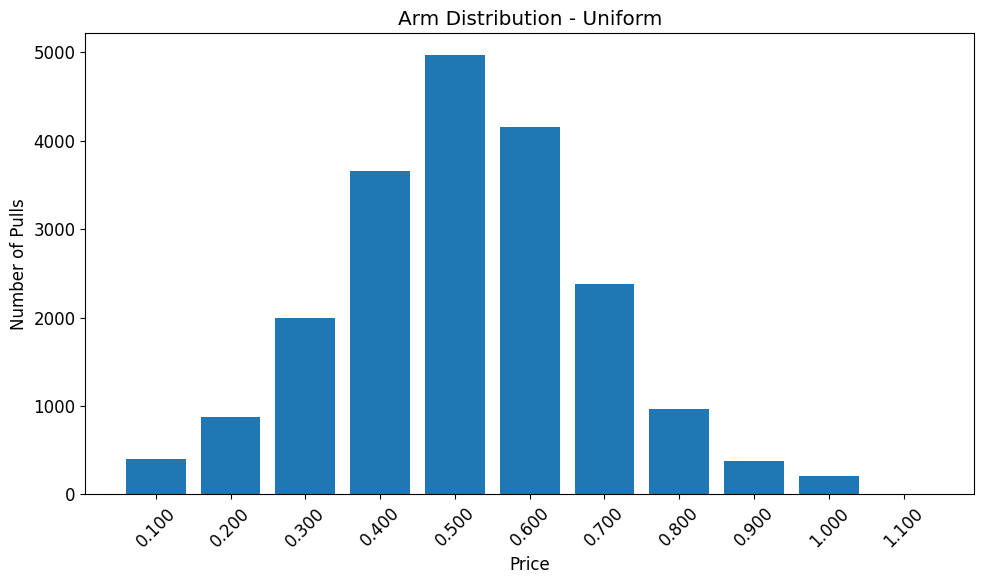

In [16]:
class Task1_2_Runner(StandardExperimentRunner):
    """Constrained UCB Pricing experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.prices = config.prices
        self.distribution = config.distribution
        self.adaptive_rho = config.adaptive_rho

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = BudgetedPricingEnvironment(
            self.prices, self.config.horizon, rng=rng, distribution=self.distribution)
        return self.env

    def create_agent(self):
        self.agent = ConstrainedUCBPricingAgent(
            len(self.prices), self.config.budget, self.config.horizon, alpha=2, adaptive_rho=self.adaptive_rho)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        if self.distribution == Distribution.UNIFORM:
            self.sell_probabilities = np.maximum(0, 1 - self.prices)
            print(f"Sell Probabilities Uniform : {self.sell_probabilities}")
            print(
                f"Expected Revenues Uniform : {self.prices * self.sell_probabilities}")
        elif self.distribution == Distribution.BETA:
            self.sell_probabilities = 1 - beta.cdf(self.prices, 2, 5)
            print(f"Sell Probabilities Beta : {self.sell_probabilities}")
            print(
                f"Expected Revenues Beta : {self.prices * self.sell_probabilities}")
        else:
            raise ValueError(f"Distribution {self.distribution} not supported")

        self.expected_reward = self.prices * self.sell_probabilities
        self.exp_util, self.gamma, self.exp_cost = compute_clairvoyant_single_product(
            self.prices, self.sell_probabilities, self.config.budget, self.config.horizon)

        return self.exp_util

    def extract_metrics(self, result) -> tuple[float, float]:
        return float(result[0]), float(result[1])


price_grid = np.concatenate([np.linspace(0.1, 1.0, 10), [1.1]])
config = ExperimentConfig(
    task_name="Task 1.2 - Constrained UCB Pricing",
    horizon=20_000,
    n_trials=3,
    seed=18,
    budget=12_000,
    prices=price_grid,
    distribution=[Distribution.BETA, Distribution.UNIFORM],
    adaptive_rho=False
)

print("Task 1.2 - Constrained UCB Pricing")
print(
    f"Prices: {len(price_grid)} prices from {price_grid[0]:.3f} to {price_grid[-2]:.3f}")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")

multi_runner = MultiDistributionRunner(Task1_2_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True)

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

With the uniform distribution the selling probabilities are set as 1 − price (clipped at 0), so even at moderately low prices the chance to sell is very high. This leads the agent to frequently sell and thus rapidly consume its budget. In contrast, the beta distribution (with parameters chosen to concentrate mass at lower values) yields lower selling probabilities for many prices, so sales occur less frequently and the budget is spent over a longer period.

## <a id="task2_1"></a>Task 2.1: Combinatorial UCB Multi-Product

Implementation of Constrained Combinatorial UCB for multi-product pricing with shared budget.


In [7]:
class Task2_1_Runner(StandardExperimentRunner):
    """Combinatorial UCB Multi-Product experiment runner"""
    
    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.n_products = config.n_products
        self.distribution = config.distribution
        self.price_grid = [np.concatenate([config.prices, [1.001]]) for _ in range(self.n_products)]
        self.adaptive_rho = config.adaptive_rho
        
    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = MultiProductPricingEnvironment(self.price_grid, self.config.horizon, rng=rng, distribution=self.distribution)
        return self.env
        
    def create_agent(self):
        self.agent = ConstrainedCombinatorialUCBAgent(self.price_grid, self.config.budget, self.config.horizon, alpha=2, adaptive_rho=self.adaptive_rho)
        return self.agent
        
    def compute_clairvoyant_reward(self) -> float:
        if self.distribution == Distribution.UNIFORM:
            f_true = [prices * np.maximum(0, (1 - prices)) for prices in self.price_grid]
            c_true = [np.maximum(0, 1 - prices) for prices in self.price_grid]
        elif self.distribution == Distribution.BETA:
            f_true = [prices * (1 - beta.cdf(prices, 5, 10)) for prices in self.price_grid]
            c_true = [1 - beta.cdf(prices, 5, 10) for prices in self.price_grid]
        else:
            raise ValueError(f"Distribution {self.distribution} not supported")

        self.clair_reward, self.simplex = solve_clairvoyant_lp(self.price_grid, self.config.budget, self.config.horizon, f_true, c_true)

        print(f"f_true: {f_true}, c_true: {c_true}")

        return self.clair_reward
        
    def extract_metrics(self, result) -> tuple[float, float]:
        rewards, costs = result
        return float(np.sum(rewards)), float(np.sum(costs))

n_products = 3
price_grid = np.linspace(0.1, 1.0, 10)

config = ExperimentConfig(
    task_name="Task 2.1 - Combinatorial UCB Multi-Product",
    horizon=10_000,
    n_trials=1,
    seed=18,
    budget=15_000,
    prices=price_grid,
    n_products=n_products,
    distribution=[Distribution.BETA  ],  #Distribution.UNIFORM
    adaptive_rho=False
)

print(f"Task 2.1 - Combinatorial UCB Multi-Product")
print(f"Products: {n_products}, Prices per product: {len(price_grid)}")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")

multi_runner = MultiDistributionRunner(Task2_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

Task 2.1 - Combinatorial UCB Multi-Product
Products: 3, Prices per product: 10
Budget: 15000, Horizon: 10000

=== Eseguendo esperimento con distribuzione Beta ===
Running Task 2.1 - Combinatorial UCB Multi-Product (Beta)
Horizon: 10000, Trials: 1
Trial 1/1... Expected cost: 1.5000
Optimal expected revenue per round: 0.4731
Optimal distribution (simplex): [0.         0.         0.17164006 0.82835994 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.        ]
f_true: [array([9.90769788e-02, 1.74032075e-01, 1.75260356e-01, 1.11702795e-01,
       4.48913574e-02, 1.05057249e-02, 1.16596413e-03, 3.68397517e-05,
       6.15637350e-08, 0.00000000e+00, 0.00000000e+00]), array([9.90769788e-02, 1.74032075e-01, 1.75260356e-01, 1.11702795e-01,
       4.48913574e-02, 1.05057249e

KeyboardInterrupt: 

## <a id="task3_1"></a>Task 3.1: Primal-Dual Non-Stationary Pricing

Implementation of Full-Feedback Primal-Dual for non-stationary environments with adversarial shocks.


Task 3.1 - Primal-Dual Non-Stationary Pricing
Budget: 6000, Horizon: 20000
Shock probability: 0.5, Frequency: 300
Prices: 16 from 0.200 to 0.980

=== Eseguendo esperimento con distribuzione Beta ===
Running Task 3.1 - Primal-Dual Non-Stationary Pricing (Beta)
Horizon: 20000, Trials: 1
Trial 1/1... Expected utility: 0.1985
Optimal distribution (gamma): [0.         0.         0.         0.         0.         0.
 0.         0.         0.63858268 0.36141732 0.         0.
 0.         0.         0.         0.        ]
Expected cost: 0.3000
✓
Expected utility: 0.1985
Optimal distribution (gamma): [0.         0.         0.         0.         0.         0.
 0.         0.         0.63858268 0.36141732 0.         0.
 0.         0.         0.         0.        ]
Expected cost: 0.3000
Esperimento Beta completato

=== Eseguendo esperimento con distribuzione Sinusoidal ===
Running Task 3.1 - Primal-Dual Non-Stationary Pricing (Sinusoidal)
Horizon: 20000, Trials: 1
Trial 1/1... Expected utility: 0.068

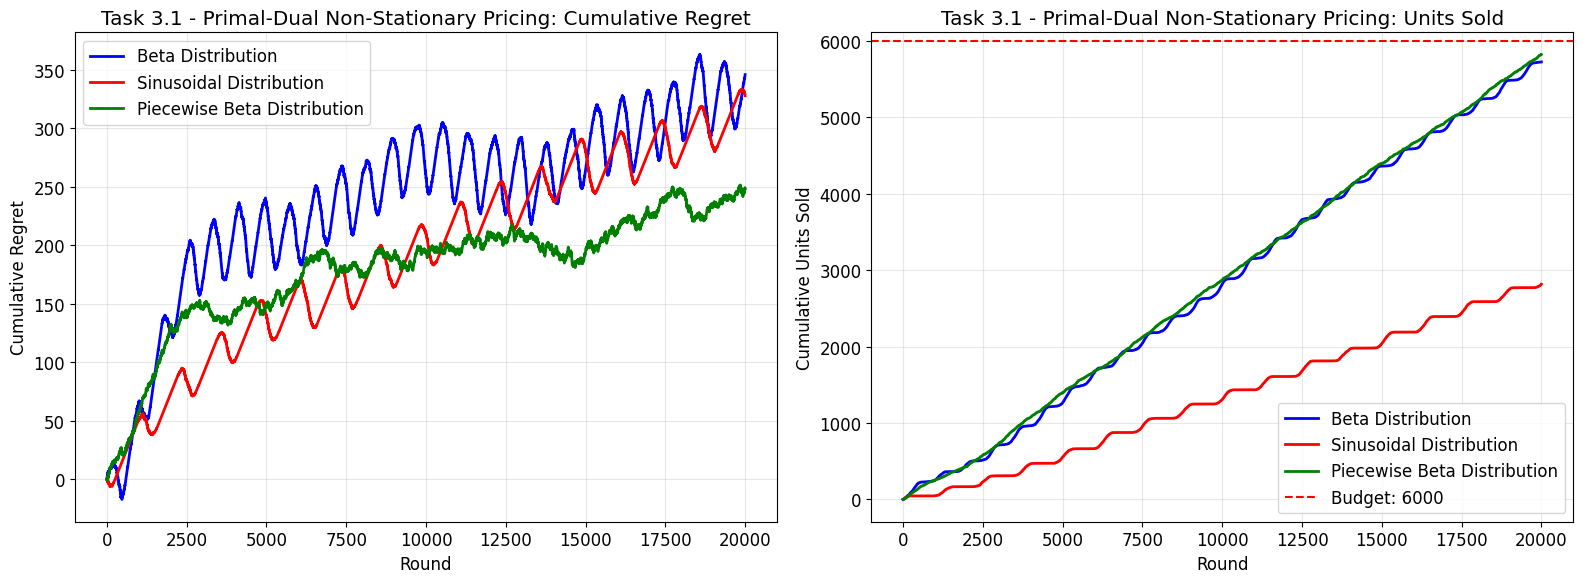


=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===

Plot per distribuzione Beta:


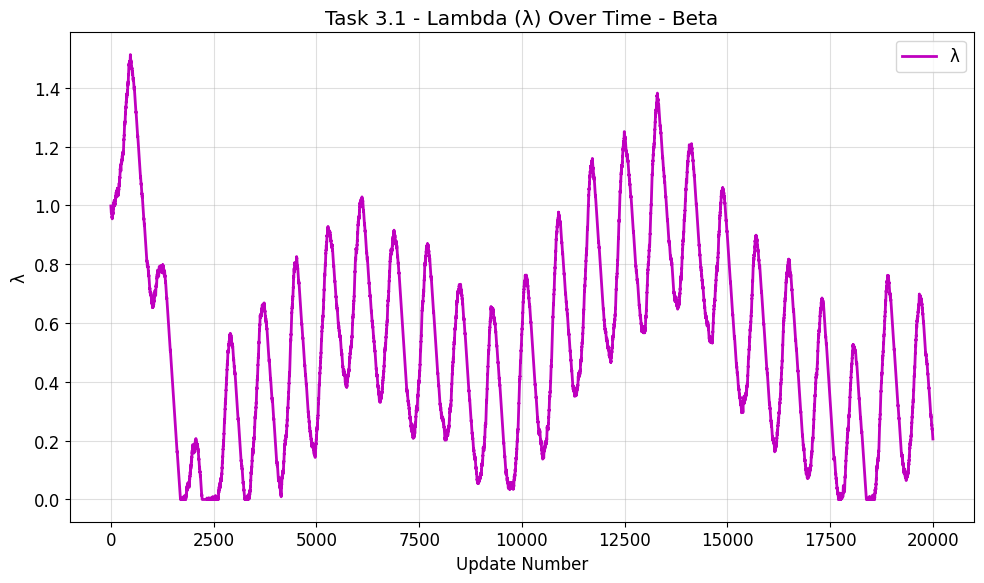

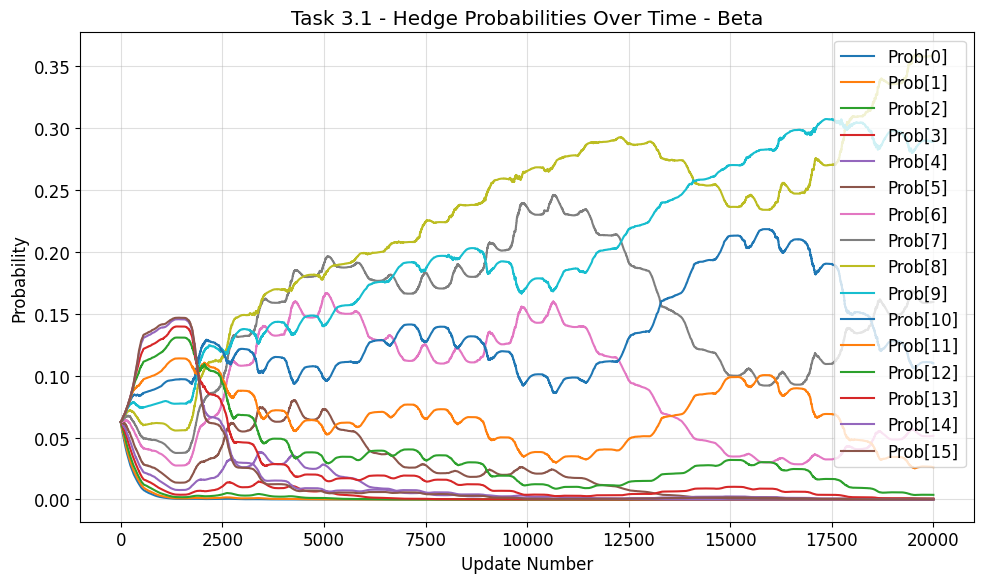


Plot per distribuzione Sinusoidal:


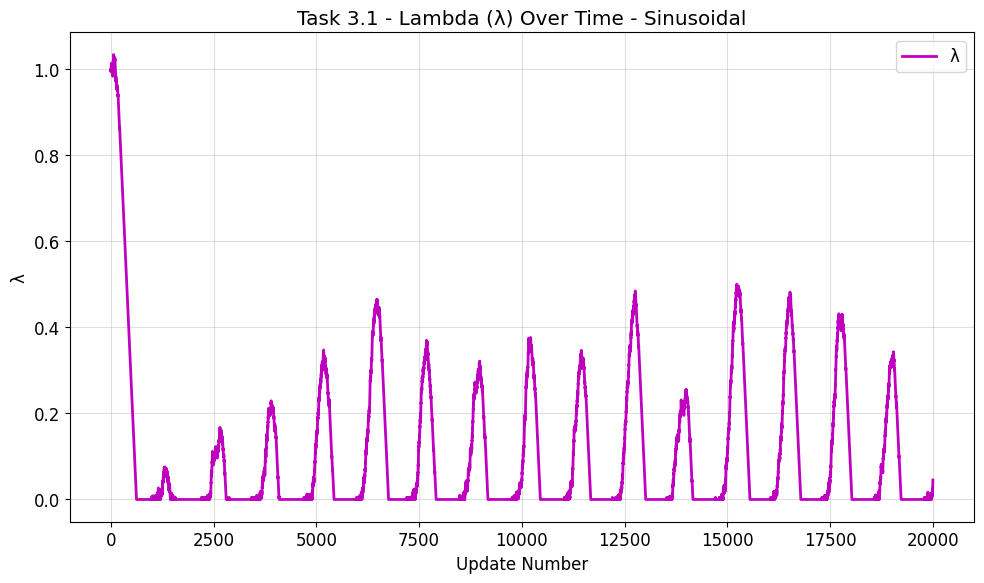

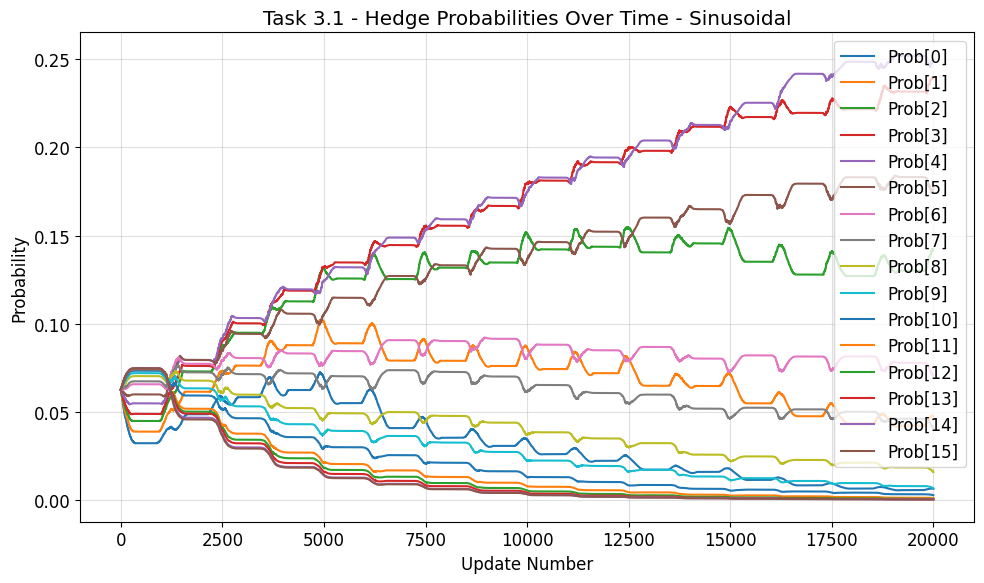


Plot per distribuzione Piecewise Beta:


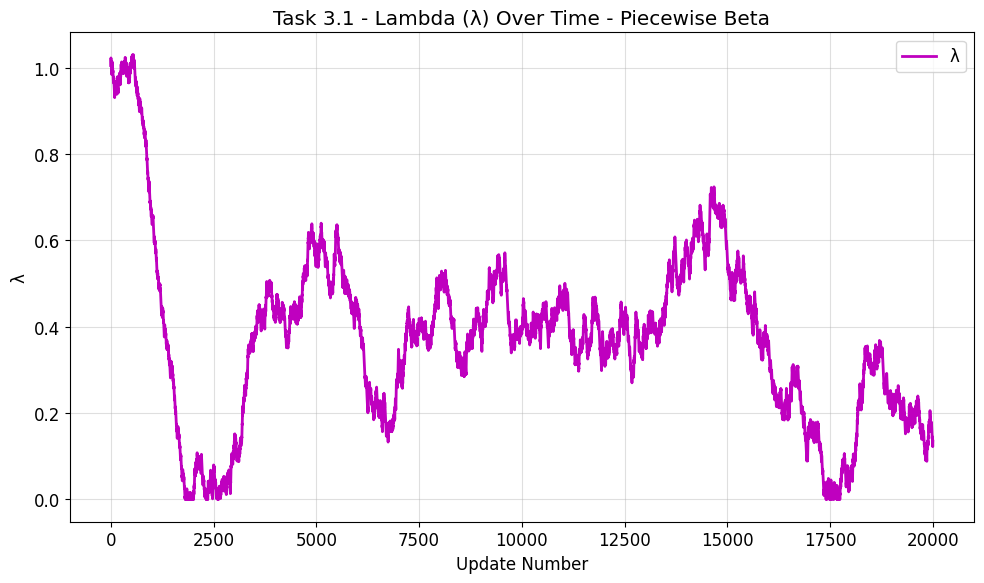

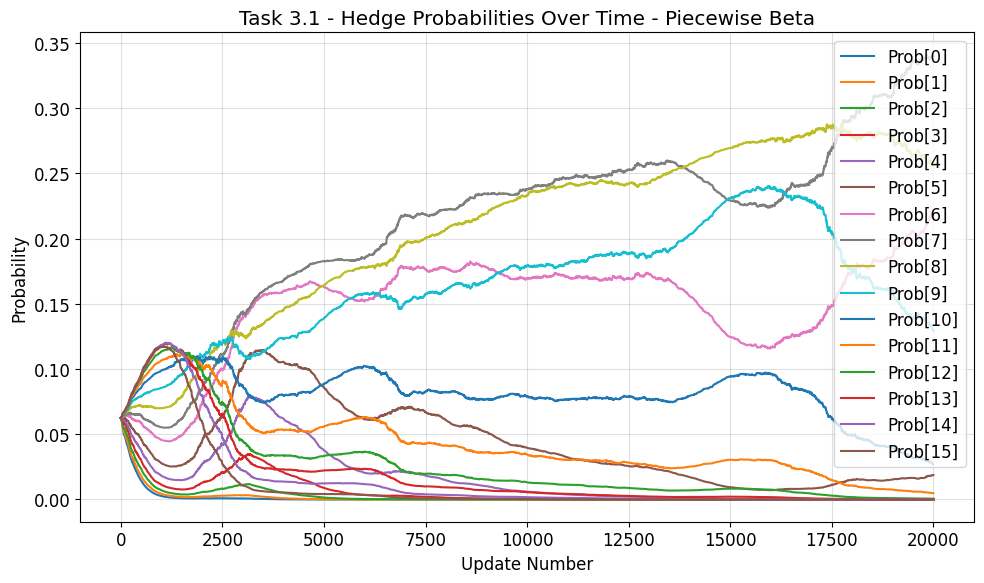


=== ANALISI DETTAGLIATA ===

--- Distribuzione Beta ---

RESULTS FOR Task 3.1 - Primal-Dual Non-Stationary Pricing (Beta)
Execution time: 11.31 seconds
Completed rounds: 20000
Average regret per round: 0.017299
Average final reward: 3623.04 ± 0.00
Efficiency vs clairvoyant: 91.3%
Average units sold: 5727.00/6000 (95.5%)

--- Distribuzione Sinusoidal ---

RESULTS FOR Task 3.1 - Primal-Dual Non-Stationary Pricing (Sinusoidal)
Execution time: 5.23 seconds
Completed rounds: 20000
Average regret per round: 0.016397
Average final reward: 1050.62 ± 0.00
Efficiency vs clairvoyant: 76.2%
Average units sold: 2818.00/6000 (47.0%)

--- Distribuzione Piecewise Beta ---

RESULTS FOR Task 3.1 - Primal-Dual Non-Stationary Pricing (Piecewise Beta)
Execution time: 2.82 seconds
Completed rounds: 20000
Average regret per round: 0.012412
Average final reward: 3496.34 ± 0.00
Efficiency vs clairvoyant: 93.4%
Average units sold: 5823.00/6000 (97.0%)

=== CONFRONTO FINALE ===
Beta: Final Average Regret = 345.

In [8]:
class Task3_1_Runner(StandardExperimentRunner):
    """Primal-Dual Non-Stationary Pricing experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.prices = config.prices
        self.shock_prob = 0.05 #extra parameter for non-stationarity
        self.freq = 50
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = NonStationaryBudgetedPricingEnvironment(
            self.prices, self.config.horizon, self.shock_prob, self.freq,num_regimes=int(config.horizon / 4), distribution=self.distribution, rng=rng
        )
        return self.env

    def create_agent(self):
        eta = 1 / np.sqrt(self.config.horizon)
        
        self.agent = FFPrimalDualPricingAgent(
            self.prices, self.config.horizon, self.config.budget, eta=eta)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        """Compute clairvoyant reward - override for specific tasks"""
        sell_probabilities = self.env.compute_sell_probabilities()
        exp_util, gamma, exp_cost = compute_clairvoyant_single_product(
            self.prices, sell_probabilities, self.config.budget, self.config.horizon
        )

        return exp_util

price_grid = create_default_prices()
config = ExperimentConfig(
    task_name="Task 3.1 - Primal-Dual Non-Stationary Pricing",
    horizon=20_000,
    n_trials=1,
    seed=17,
    budget=6_000,
    prices=price_grid,
    distribution=[Distribution.BETA, Distribution.UNIFORM_SINUSOIDAL, Distribution.PIECEWISE_BETA]
)

print(f"Task 3.1 - Primal-Dual Non-Stationary Pricing")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Shock probability: {0.50}, Frequency: {300}")
print(f"Prices: {len(price_grid)} from {price_grid[0]:.3f} to {price_grid[-2]:.3f}")

multi_runner = MultiDistributionRunner(Task3_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 3.1 - Lambda (λ) Over Time - {name}")
    
    StandardPlotter.plot_hedge_probabilities(
        result.final_agents[0], title=f"Task 3.1 - Hedge Probabilities Over Time - {name}")

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## <a id="task3_2"></a>Task 3.2: Primal-Dual Non-Stationary Pricing

Implementation of Full-Feedback Primal-Dual for non-stationary environments with adversarial shocks.


Task 3.2 - Primal-Dual Non-Stationary Pricing
Budget: 3000, Horizon: 10000
Shock probability: 0.5, Frequency: 300
Prices: 16 from 0.200 to 0.980

=== Eseguendo esperimento con distribuzione Beta ===
Running Task 3.2 - Primal-Dual Non-Stationary Pricing (Beta)
Horizon: 10000, Trials: 3
Trial 1/3... rho: 0.3
Expected utility: 0.1994
Optimal distribution (gamma): [0.         0.         0.         0.         0.         0.
 0.         0.         0.58024691 0.41975309 0.         0.
 0.         0.         0.         0.        ]
Expected cost: 0.3000
Trial 1: Agent stopped at round 8131. ✓
Trial 2/3... rho: 0.3
Expected utility: 0.1980
Optimal distribution (gamma): [0.         0.         0.         0.         0.         0.
 0.         0.         0.67215815 0.32784185 0.         0.
 0.         0.         0.         0.        ]
Expected cost: 0.3000
Trial 2: Agent stopped at round 8125. ✓
Trial 3/3... rho: 0.3
Expected utility: 0.1979
Optimal distribution (gamma): [0.         0.         0.      

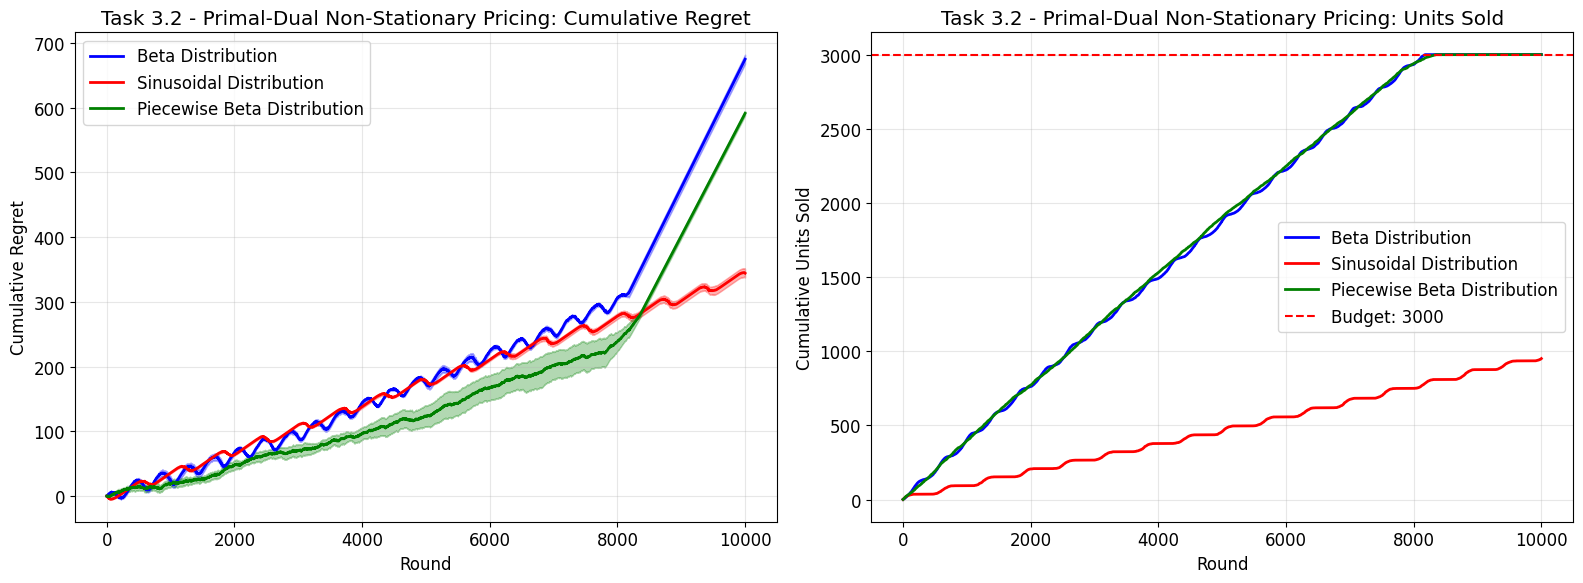


=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===

Plot per distribuzione Beta:


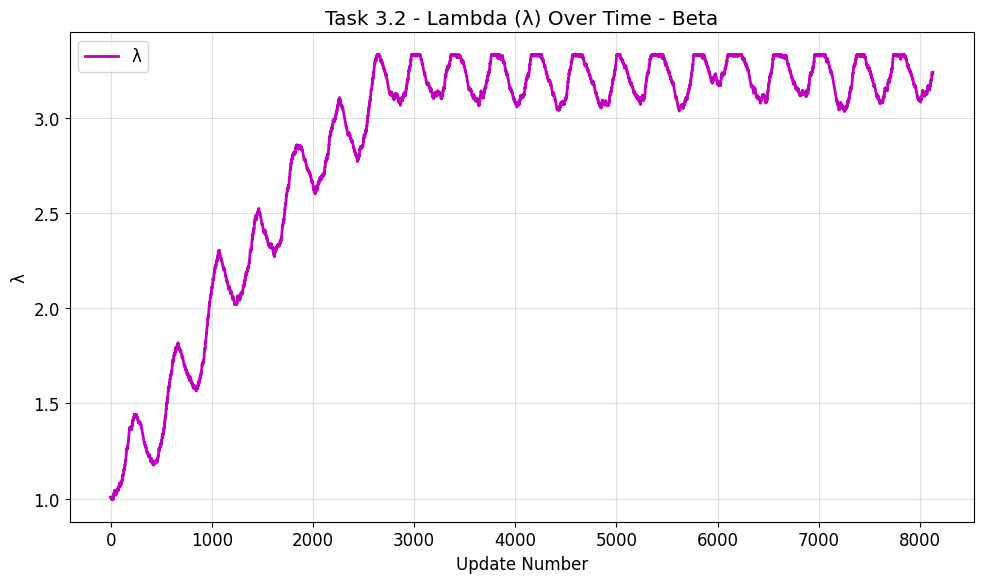

No hedge history recorded in the agent.

Plot per distribuzione Sinusoidal:


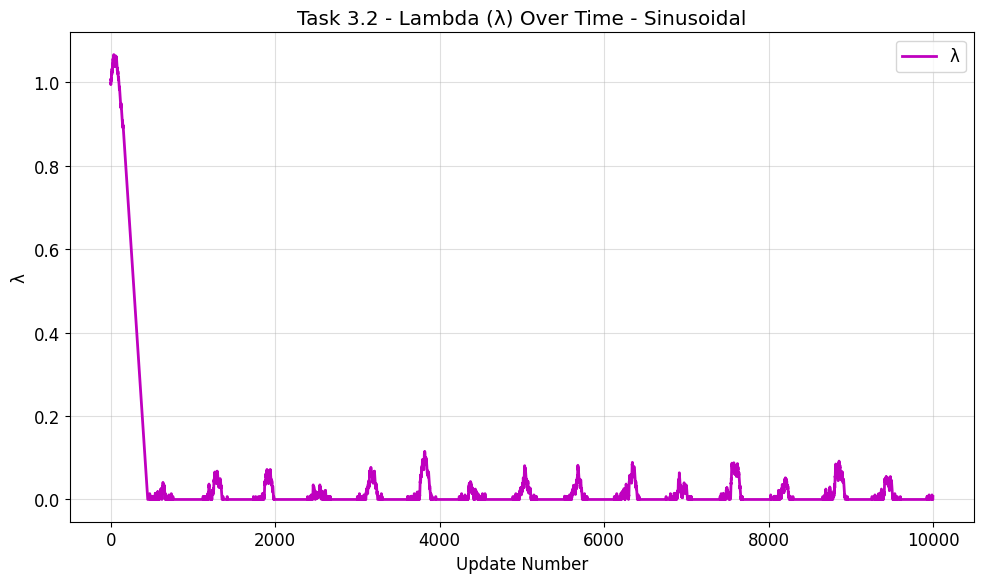

No hedge history recorded in the agent.

Plot per distribuzione Piecewise Beta:


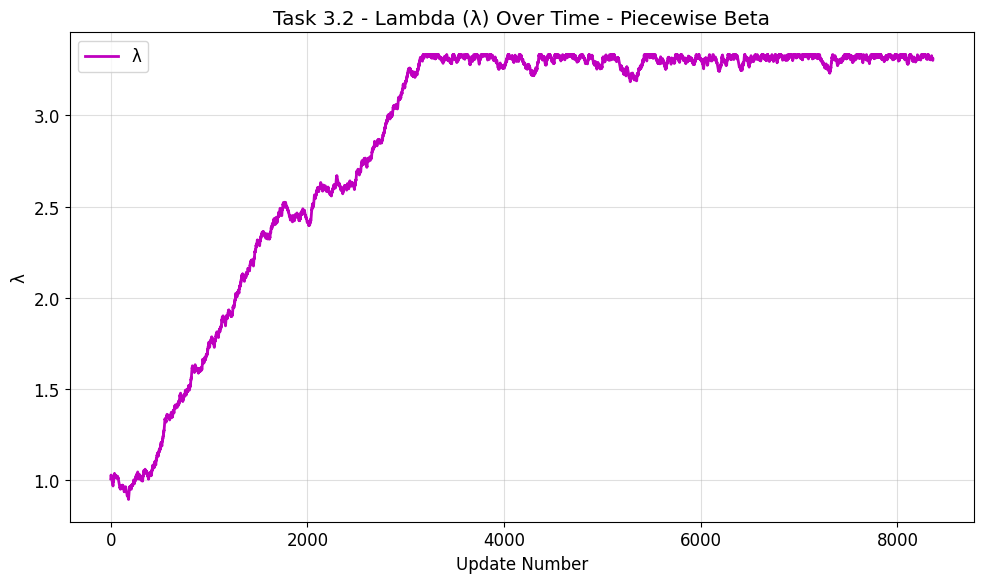

No hedge history recorded in the agent.

=== ANALISI DETTAGLIATA ===

--- Distribuzione Beta ---

RESULTS FOR Task 3.2 - Primal-Dual Non-Stationary Pricing (Beta)
Execution time: 9.02 seconds
Completed rounds: 10000
Average regret per round: 0.067498
Average final reward: 1309.23 ± 10.12
Efficiency vs clairvoyant: 66.1%
Average units sold: 3000.00/3000 (100.0%)

--- Distribuzione Sinusoidal ---

RESULTS FOR Task 3.2 - Primal-Dual Non-Stationary Pricing (Sinusoidal)
Execution time: 6.89 seconds
Completed rounds: 10000
Average regret per round: 0.034426
Average final reward: 347.02 ± 9.58
Efficiency vs clairvoyant: 50.0%
Average units sold: 950.33/3000 (31.7%)

--- Distribuzione Piecewise Beta ---

RESULTS FOR Task 3.2 - Primal-Dual Non-Stationary Pricing (Piecewise Beta)
Execution time: 5.13 seconds
Completed rounds: 10000
Average regret per round: 0.059139
Average final reward: 1303.89 ± 16.26
Efficiency vs clairvoyant: 68.6%
Average units sold: 3000.00/3000 (100.0%)

=== CONFRONTO FIN

In [5]:
class Task3_2_Runner(StandardExperimentRunner):
    """Primal-Dual Non-Stationary Pricing experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.prices = config.prices
        self.shock_prob = 0.05
        self.freq = 50
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = NonStationaryBudgetedPricingEnvironment(
            self.prices, self.config.horizon, self.shock_prob, self.freq,
            num_regimes= int(self.config.horizon / 4), rng=rng, distribution=self.distribution
        )
        return self.env

    def create_agent(self):
        self.agent = BanditFeedbackPrimalDual(
            self.prices, self.config.horizon, self.config.budget)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        """Compute clairvoyant reward - override for specific tasks"""
        sell_probabilities = self.env.compute_sell_probabilities()
        exp_util, gamma, exp_cost = compute_clairvoyant_single_product(
            self.prices, sell_probabilities, self.config.budget, self.config.horizon
        )
        return exp_util

price_grid = create_default_prices()
config = ExperimentConfig(
    task_name="Task 3.2 - Primal-Dual Non-Stationary Pricing",
    horizon=10_000,
    n_trials=3,
    seed=17,
    budget=3_000,
    prices=price_grid,
    distribution=[Distribution.BETA, Distribution.UNIFORM_SINUSOIDAL, Distribution.PIECEWISE_BETA]
)

print(f"Task 3.2 - Primal-Dual Non-Stationary Pricing")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Shock probability: {0.50}, Frequency: {300}")
print(f"Prices: {len(price_grid)} from {price_grid[0]:.3f} to {price_grid[-2]:.3f}")

multi_runner = MultiDistributionRunner(Task3_2_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 3.2 - Lambda (λ) Over Time - {name}")
    
    if hasattr(result.final_agents[0], 'hedge_weight_history'):
        StandardPlotter.plot_hedge_probabilities(
            result.final_agents[0], title=f"Task 3.2 - Hedge Probabilities Over Time - {name}")
    else:
        print(f"Hedge probabilities non disponibili per {name} (Bandit Feedback)")

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## Task 4.1: Multi-Product Primal-Dual

Implementazione di Multi-Product Full-Feedback Primal-Dual per ambienti correlati multi-prodotto.


In [ ]:
class Task4_1_Runner(StandardExperimentRunner):
    """Multi-Product Primal-Dual experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.n_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.n_products)
        ]
        self.distribution = config.distribution
        
        self.phi = 0.0
        self.mu0, self.A, self.f = 0.5, 0.1, 100
        self.sigma0, self.A_sigma, self.phi_sigma, self.rho0 = 0.1, 0.1, 0, 0.6

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        valuation_params = {
            'mu0': self.mu0, 'A': self.A, 'f': self.f, 'phi': self.phi,
            'sigma0': self.sigma0, 'A_sigma': self.A_sigma, 'phi_sigma': self.phi_sigma, 'rho0': self.rho0,
            'num_regimes': self.config.horizon // 4
        }
        self.env = MultiProductBudgetedPricingEnvironment(self.config.horizon, self.n_products, valuation_params, distribution=self.distribution, rng=rng)
        return self.env

    def create_agent(self) -> MultiProductFFPrimalDualPricingAgent:
        eta = 1 / np.sqrt(self.config.horizon)
        self.agent = MultiProductFFPrimalDualPricingAgent(self.price_grid, self.config.horizon, self.config.budget, self.n_products, eta)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        exp_util, gamma, exp_cost = compute_extended_clairvoyant(
            self.env.valuations, self.price_grid[0], self.config.budget)
        return exp_util

prices = create_default_prices()
config = ExperimentConfig(
    task_name="Task 4.1 - Multi-Product Primal-Dual",
    horizon=10_000,
    n_trials=1,
    seed=42,
    budget=8_000,
    prices=prices,
    n_products=4,
    distribution=[Distribution.SIMPLE_TV, Distribution.PIECEWISE_TV]
)

print(f"Task 4.1 - Multi-Product Primal-Dual")
print(f"Products: 4, Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices: {len(prices)} from {prices[0]:.3f} to {prices[-2]:.3f}")
print(f"Correlation parameters: μ₀=0.5, ρ₀=0.6")

multi_runner = MultiDistributionRunner(Task4_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 4.1 - Lambda (λ) Over Time - {name}")
    
    StandardPlotter.plot_multi_hedge_probabilities(
        result.final_agents[0], 
        title=f"Task 4.1 - Multi-Product Hedge Probabilities Over Time - {name}")

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## Task 4.2: Multi-Product Primal-Dual

Implementazione di Multi-Product Full-Feedback Primal-Dual per ambienti correlati multi-prodotto.

In [ ]:
class Task4_2_Runner(StandardExperimentRunner):
    """Multi-Product Primal-Dual experiment runner"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.n_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.n_products)
        ]
        self.distribution = config.distribution

        self.phi = 0.0
        self.mu0, self.A, self.f = 0.5, 0.1, 100
        self.sigma0, self.A_sigma, self.phi_sigma, self.rho0 = 0.1, 0.1, 0, 0.6

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        valuation_params = {
            'mu0': self.mu0, 'A': self.A, 'f': self.f, 'phi': self.phi,
            'sigma0': self.sigma0, 'A_sigma': self.A_sigma, 'phi_sigma': self.phi_sigma, 'rho0': self.rho0,
            'num_regimes': self.config.horizon // 4
        }
        self.env = MultiProductBudgetedPricingEnvironment(
            self.config.horizon, self.n_products, valuation_params, distribution=self.distribution, rng=rng
        )
        return self.env

    def create_agent(self) -> MultiProductPDExp3PricingAgent:
        eta = 1 / np.sqrt(self.config.horizon)
        self.agent = MultiProductPDExp3PricingAgent(
            self.price_grid, self.config.horizon, self.config.budget, self.n_products, eta)
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        exp_util, gamma, exp_cost = compute_extended_clairvoyant(
            self.env.valuations, self.price_grid[0], self.config.budget)
        return exp_util

prices = create_default_prices()
config = ExperimentConfig(
    task_name="Task 4.2 - Multi-Product Primal-Dual",
    horizon=10_000,
    n_trials=1,
    seed=42,
    budget=9_000,
    prices=prices,
    n_products=3,
    distribution=[Distribution.PIECEWISE_TV, Distribution.SIMPLE_TV]
)

print(f"Task 4.2 - Multi-Product Primal-Dual")
print(f"Products: {config.n_products}, Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices: {len(prices)} from {prices[0]:.3f} to {prices[-2]:.3f}")
print(f"Correlation parameters: μ₀=0.5, ρ₀=0.6")

multi_runner = MultiDistributionRunner(Task4_2_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True, show_budget=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 4.2 - Lambda (λ) Over Time - {name}")
    
    if hasattr(result.final_agents[0], 'hedge_prob_history'):
        StandardPlotter.plot_multi_hedge_probabilities(
            result.final_agents[0], 
            title=f"Task 4.2 - Multi-Product Hedge Probabilities Over Time - {name}")
    else:
        print(f"Multi-hedge probabilities non disponibili per {name} (EXP3.P Bandit Feedback)")

multi_runner.print_analysis()

multi_runner.plot_arm_distributions()

## Task 5.1: Sliding Window per Non-Stazionarietà

Implementazione di Constrained Combinatorial UCB con Sliding Window per adattamento locale a cambiamenti.


In [ ]:
class Task5_1_Runner(StandardExperimentRunner):
    """Smooth Multi-Product Pricing with Sliding Window UCB"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.N_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.N_products)
        ]
        self.num_windows = config.n_windows
        self.window_size = np.sqrt(self.config.horizon)
        self.window_size = int(
            (config.horizon * np.log(config.horizon)) ** (2/3))
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = SmoothMultiProductPricingEnvironment(
            self.price_grid, self.config.horizon, rng=rng, 
            distribution=self.distribution, n_products=self.N_products, 
            num_windows=self.num_windows
        )
        return self.env

    def create_agent(self):
        self.agent = SlidingWindowConstrainedCombinatorialUCBAgent(
            self.price_grid, self.config.budget, self.config.horizon,
            window_size=self.window_size
        )
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        full_prices = self.price_grid[0]
        self.clairvoyant_reward, self.simplex, self.expected_cost = compute_extended_clairvoyant(
            self.env.valuations, full_prices, self.config.budget
        )
        return self.clairvoyant_reward

    def extract_metrics(self, result) -> Tuple[float, float]:
        rewards, costs, _ = result
        return float(np.sum(rewards)), float(np.sum(costs))

    def run_single_trial(self, trial: int) -> Tuple[List[float], List[int], float, Any]:
        """Run a single trial and return regrets, units sold, final reward, and final agent"""
        trial_seed = self.config.seed + trial
        np.random.seed(trial_seed)

        self.env = self.create_environment(trial_seed)
        self.agent = self.create_agent()

        regrets = []
        units_sold = []
        cum_reward = 0.0
        cum_regret = 0.0
        cum_units = 0.0

        clairvoyant_reward = self.compute_clairvoyant_reward()

        for t in range(self.config.horizon):
            action = self.agent.pull_arm()

            if action is None:
                print(f"Trial {trial+1}: Agent stopped at round {t}.", end=" ")
                break

            rewards, costs, _ = self.env.round(action)

            self.agent.update(rewards, costs)

            reward, cost = float(np.sum(rewards)), float(np.sum(costs))

            cum_reward += reward
            cum_units += cost

            instant_regret = clairvoyant_reward - reward
            cum_regret += instant_regret

            regrets.append(cum_regret)
            units_sold.append(int(cum_units))

        return regrets, units_sold, cum_reward, self.agent


base_prices = np.linspace(0, 1, 15)

config = ExperimentConfig(
    task_name="Task 5.1 - Smooth Multi-Product Pricing",
    horizon=30_000,
    n_trials=1,
    seed=18,
    budget=40_000,
    prices=base_prices,
    n_products=3,
    n_windows=4,
    distribution=[Distribution.SMOOTH]
)

print(f"Task 5.1 - Smooth Multi-Product Pricing")
print(f"Products: {config.n_products}, Temporal windows: 4")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices per product: {len(base_prices) + 1}")

multi_runner = MultiDistributionRunner(Task5_1_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True)

multi_runner.print_analysis()

# 5.2 Comparison with Primal Dual Hedge

In [ ]:
class Task5_2_Runner(StandardExperimentRunner):
    """Smooth Multi-Product Pricing with Sliding Window UCB"""
    
    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.N_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.N_products)
        ]
        self.num_windows = config.n_windows
        self.distribution = config.distribution
        
    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = SmoothMultiProductPricingEnvironment(
            self.price_grid, self.config.horizon, n_products=self.N_products, num_windows=self.num_windows, rng=rng, distribution=self.distribution
        )
        return self.env
        
    def create_agent(self):
        self.agent = MultiProductFFPrimalDualPricingAgent(
            self.price_grid, self.config.horizon, self.config.budget, 
            n_products = self.N_products, eta = 1 / np.sqrt(self.config.horizon)
        )
        return self.agent
        
    def compute_clairvoyant_reward(self) -> float:
        self.clair_reward, self.simplex, self.expected_cost = compute_extended_clairvoyant(
            self.env.valuations, self.price_grid[0], self.config.budget
        )
        return self.clair_reward
        
    def extract_metrics(self, result) -> Tuple[float, float]:
        rewards, costs = result
        return float(np.sum(rewards)), float(np.sum(costs))
    
    def run_single_trial(self, trial: int):
        """Custom trial runner for Task 5.2 with smooth valuation data"""
        trial_seed = self.config.seed + trial
        np.random.seed(trial_seed)
        
        env = self.create_environment(trial_seed)
        agent = self.create_agent()
        
        regrets = []
        units_sold = []
        cum_reward = 0.0
        cum_regret = 0.0
        cum_units = 0

        self.compute_clairvoyant_reward()

        
        print(f"Trial {trial+1}/{self.config.n_trials}...")
        
        for t in range(self.config.horizon):
            choice = agent.pull_arm()
            if choice is None or np.any([c is None for c in choice]):
                print(f"Trial {trial+1}: Budget exhausted at round {t}.")
                break
                
            rewards, costs, val = env.round(choice)
            
            agent.update(val)

            actual_rew = rewards.sum()
            actual_units = costs.sum()
            cum_reward += actual_rew
            
            instant_regret = self.clair_reward - actual_rew
            cum_regret += instant_regret
            cum_units += actual_units
            regrets.append(cum_regret)
            units_sold.append(int(cum_units))

        print(f"Trial {trial+1}: Final reward = {cum_reward:.2f}")
        print(f"Trial {trial+1}: Budget used = {cum_units}/{self.config.budget} ({100*cum_units/self.config.budget:.1f}%)")
        if regrets is not None and len(regrets) > 0:
            regret_per_round = cum_regret / float(len(regrets))
            print(f"Trial {trial+1}: Final regret per round = {regret_per_round:.4f}")
        else:
            print(f"Trial {trial+1}: No regret data collected")
        
        return regrets, units_sold, cum_reward, agent


base_prices = np.linspace(0, 1, 15)
config = ExperimentConfig(
    task_name="Task 5.2 - Smooth Multi-Product Pricing",
    horizon=10_000,
    n_trials=1,
    seed=18,
    budget=8_000,
    prices=base_prices,
    n_products=3,
    n_windows=4,
    distribution=[Distribution.SMOOTH]
)

print(f"Task 5.2 - Smooth Multi-Product Pricing")
print(f"Products: {config.n_products}, Temporal windows: 4")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices per product: {len(base_prices) + 1}")

multi_runner = MultiDistributionRunner(Task5_2_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 5.2 - Lambda (λ) Over Time - {name}")
    
    StandardPlotter.plot_multi_hedge_probabilities(
        result.final_agents[0], 
        title=f"Task 5.2 - Multi-Product Hedge Probabilities Over Time - {name}")

# 5.3 Comparison with Primal Dual ExP3.P

In [ ]:
class Task5_3_Runner(StandardExperimentRunner):
    """Smooth Multi-Product Pricing with Sliding Window UCB"""

    def __init__(self, config: ExperimentConfig):
        super().__init__(config)
        self.n_products = config.n_products
        self.price_grid = [
            np.concatenate([config.prices, [1.001]])
            for _ in range(self.n_products)
        ]
        self.num_windows = config.n_windows
        self.window_size = int(
            (config.horizon * np.log(config.horizon)) ** (2/3))
        self.distribution = config.distribution

    def create_environment(self, trial_seed: int):
        rng = np.random.default_rng(trial_seed)
        self.env = SmoothMultiProductPricingEnvironment(
            self.price_grid, self.config.horizon, n_products=self.n_products, num_windows=self.num_windows, rng=rng, distribution=self.distribution
        )
        return self.env

    def create_agent(self):
        self.agent = MultiProductPDExp3PricingAgent(
            self.price_grid, self.config.horizon, self.config.budget,
            n_products=self.n_products
        )
        return self.agent

    def compute_clairvoyant_reward(self) -> float:
        full_prices = self.price_grid[0]
        self.clair_reward, self.simplex, self.expected_cost = compute_extended_clairvoyant(
            self.env.valuations, full_prices, self.config.budget
        )
        return self.clair_reward

    def extract_metrics(self, result) -> Tuple[float, float]:
        rewards, costs, _ = result
        return float(np.sum(rewards)), float(np.sum(costs))

    def run_single_trial(self, trial: int):
        """Custom trial runner for Task 5.3 with smooth valuation data"""
        trial_seed = self.config.seed + trial
        np.random.seed(trial_seed)

        env = self.create_environment(trial_seed)
        agent = self.create_agent()

        regrets = []
        units_sold = []
        cum_reward = 0.0
        cum_regret = 0.0
        cum_units = 0

        print(f"Trial {trial+1}/{self.config.n_trials}...")
        self.compute_clairvoyant_reward()

        for t in range(self.config.horizon):
            choice = agent.pull_arm()
            if choice is None:
                print(f"Trial {trial+1}: Budget exhausted at round {t}.")
                break

            rewards, costs, val = env.round(choice)
            agent.update(val)

            reward, cost = float(np.sum(rewards)), float(np.sum(costs))
            cum_reward += reward

            # Compute instantaneous regret
            instant_regret = self.clair_reward - reward
            cum_regret += instant_regret
            cum_units += cost
            regrets.append(cum_regret)
            units_sold.append(int(cum_units))

        print(f"Trial {trial+1}: Final reward = {cum_reward:.2f}")
        print(
            f"Trial {trial+1}: Budget used = {cum_units}/{self.config.budget} ({100*cum_units/self.config.budget:.1f}%)")
        if len(regrets) > 0:
            regret_per_round = cum_regret / float(len(regrets))
            print(
                f"Trial {trial+1}: Final regret per round = {regret_per_round:.4f}")
        else:
            print(f"Trial {trial+1}: No regret data collected")

        return regrets, units_sold, cum_reward, agent


base_prices = np.linspace(0, 1, 15)

config = ExperimentConfig(
    task_name="Task 5.3 - Smooth Multi-Product Pricing",
    horizon=10_000,
    n_trials=1,
    seed=18,
    budget=5_000,
    prices=base_prices,
    n_products=3,
    n_windows=4,
    distribution=[Distribution.SMOOTH]
)

print(f"Task 5.3 - Smooth Multi-Product Pricing")
print(f"Products: {config.n_products}, Temporal windows: 4")
print(f"Budget: {config.budget}, Horizon: {config.horizon}")
print(f"Prices per product: {len(base_prices) + 1}")

multi_runner = MultiDistributionRunner(Task5_3_Runner, config)
results = multi_runner.run_experiment()

multi_runner.plot_comparison(show_units=True)

print(f"\n=== PLOT SPECIFICI PER OGNI DISTRIBUZIONE ===")
for name, result in results.items():
    print(f"\nPlot per distribuzione {name}:")
    
    StandardPlotter.plot_lambda(
        result.final_agents[0], title=f"Task 5.3 - Lambda (λ) Over Time - {name}")
    
    StandardPlotter.plot_multi_hedge_probabilities(
        result.final_agents[0], 
        title=f"Task 5.3 - Multi-Product Hedge Probabilities Over Time - {name}")

multi_runner.print_analysis()